In [ ]:
# importing the packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
loan=pd.read_csv('loan.csv') # read the file

<ipython-input-2-6d1296d21e00>:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan=pd.read_csv('loan.csv') # read the file


In [ ]:
loan.shape # checking the shape of the data

(39717, 111)

In [ ]:
loan.isnull().sum() # checking the null value in the data

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [ ]:
list=[i for i in loan.columns if loan[i].isnull().sum() > 0.60 *len(loan)] # columns which ha 60%or more null values 


loan.drop(list,axis=1, inplace = True) # drop the columns

In [ ]:
loan.drop(['id','member_id','url','desc','initial_list_status','chargeoff_within_12_mths','tax_liens','zip_code'],axis=1, inplace = True)
# dropping more columns which will not be utilised as the data is not sufficient or clear

In [ ]:
# checking the null value in the remaining columns
loan.isnull().sum()

loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
purpose                          0
title                           11
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util                      50
total_acc                        0
out_prncp           

In [ ]:
loan[loan.duplicated()] ## 0 rows are duplicate

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies


In [ ]:
# cleaning the data 


In [ ]:
# dropping loan_status with value current
loan=loan[~(loan['loan_status'] == 'Current')]

In [ ]:

loan['pub_rec_bankruptcies']=loan['pub_rec_bankruptcies'].fillna('Unknown')




In [ ]:
# emp_length has null values and are string which contains characters like > +

#loan['emp_length'].apply(lambda x: int(0) if x == '< 1 year' else x)
loan['emp_length']=loan['emp_length'].str.strip("'+' '<' years")
loan['emp_length']=loan['emp_length'].fillna(0)
loan['emp_length']=loan['emp_length'].apply(lambda x: int(x))





In [ ]:
# removing % from the int_rate
loan['int_rate']=loan['int_rate'].str.strip("%")
loan['int_rate']=loan['int_rate'].apply(lambda x: float(x))


In [ ]:
#removing months from term
loan['term']=loan['term'].str.strip('months')
loan['term']=loan['term'].apply(lambda x: int(x))


In [ ]:
#derived variable

In [ ]:
# taking out month and year for issue date
loan['issue_d_month']=pd.to_datetime(loan.issue_d,format='%b-%y').dt.month
loan['issue_d_year']=pd.to_datetime(loan.issue_d,format='%b-%y').dt.year



In [ ]:
#grouping the loan term
loan['loan_amount_grp'] = pd.cut(loan['loan_amnt'], [0, 5000, 10000, 15000, 20000, 25000], labels=['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000 +'])


In [ ]:
#grouping the interest rate 
loan['int_rate_grp']=pd.cut(loan['int_rate'], [0, 5, 10, 15, 20, 25], labels=['0-5','5-10','10-15','15-20','20+'])

In [ ]:
#grouping of annual income group
loan['annual_inc_grp'] = pd.cut(loan['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

In [ ]:
# grouping the installment and dti
loan['installment_grp'] = pd.cut(loan['installment'],[0,200,400,600,800,1000,1200],labels=['0-200','200-400','400-600','600-800','800-1000','1000+'])
loan['dti_grp'] = pd.cut(loan['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

In [ ]:
#relationship between the loan_amnt,funded_amnt,funded_amnt_inv . all three be have similarly we can take any loan_amnt for analysis 

In [ ]:
# find the outliers
loan1=loan[['emp_length','annual_inc','loan_amnt','funded_amnt','int_rate']]
def find_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers
df_loan1=loan1.apply(find_outliers) 

print(df_loan1)

       emp_length  annual_inc  loan_amnt  funded_amnt  int_rate
31            NaN         NaN    31825.0      31825.0       NaN
74            NaN    150000.0        NaN          NaN       NaN
80            NaN    150000.0    35000.0          NaN       NaN
128           NaN         NaN    35000.0      35000.0       NaN
170           NaN    225000.0        NaN          NaN       NaN
...           ...         ...        ...          ...       ...
39694         NaN    150000.0        NaN          NaN       NaN
39703         NaN    200000.0        NaN          NaN       NaN
39706         NaN    180000.0        NaN          NaN       NaN
39707         NaN    180000.0        NaN          NaN       NaN
39715         NaN    200000.0        NaN          NaN       NaN

[2632 rows x 5 columns]


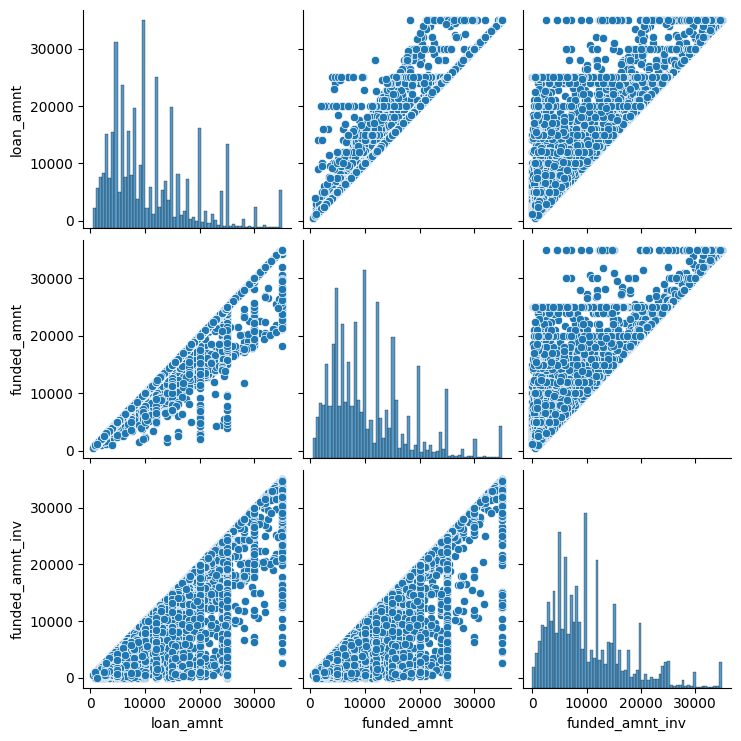

In [ ]:
sns.pairplot(loan[['loan_amnt','funded_amnt','funded_amnt_inv']])
plt.show()

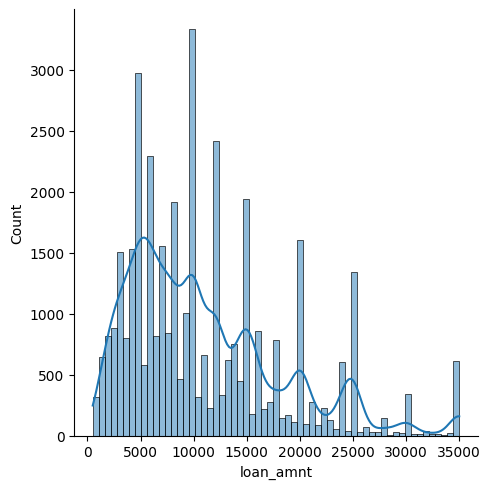

In [ ]:
#univariate analysis of loan_amount
 # maximum people have taken loan betweem 5000 to 15000 and 10000 is the maximum frequency. people have taken 500 to max 35000 loan

sns.displot(loan['loan_amnt'], kde=True)

In [ ]:
loan['loan_amnt'].describe() # mean is 11219


count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

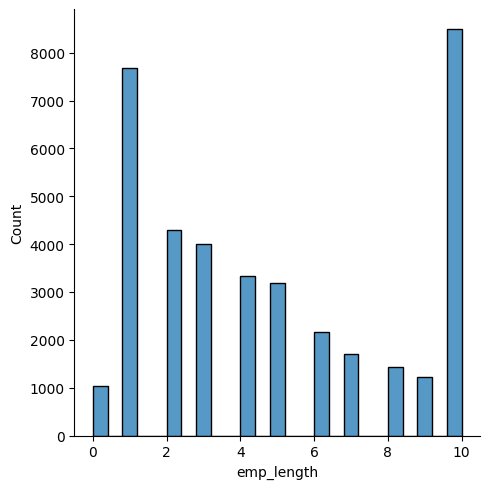

In [ ]:
# more loan application is from more experience and less experience
sns.displot(loan['emp_length'])

In [ ]:
# analysis of term column
loan['term'].describe()

count    38577.000000
mean        41.898437
std         10.333136
min         36.000000
25%         36.000000
50%         36.000000
75%         36.000000
max         60.000000
Name: term, dtype: float64

In [ ]:
loan['term'].value_counts() # approx 3: 1 ratio of loan taken for 36 months people prefer 36 months than longer duration


36    29096
60     9481
Name: term, dtype: int64

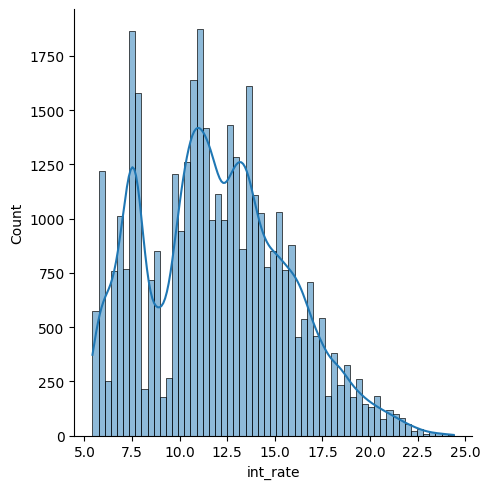

In [ ]:
# analysis of intereset rate
sns.displot(loan['int_rate'], kde=True) # people dont prefer loan on higher interest rate ,maximum loaan is in between 10% to 15 %

In [ ]:
loan['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

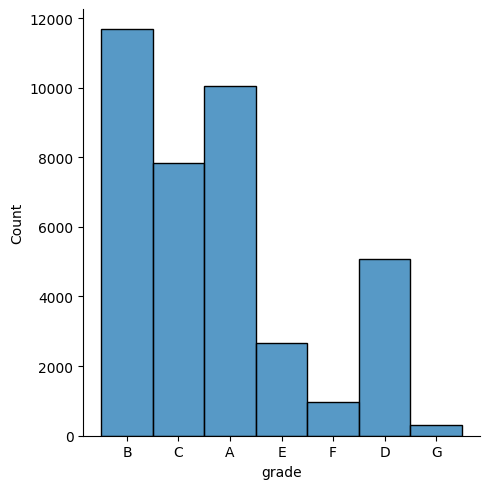

In [67]:
#analysis of the grade B grade has taken the maximum loan loan application is decresing with credit grade increase
sns.displot(loan['grade'])

In [ ]:
# univariate analysis of annual income

In [ ]:
loan['annual_inc'].describe() # there are outliers maximum is 100 times need to remove outliers

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [ ]:
loan['annual_inc']=loan['annual_inc'].apply(lambda x: 68968 if x > loan['annual_inc'].quantile(0.98) else x)

In [ ]:
loan['annual_inc'].describe() # after removing outliers

count     38577.000000
mean      63984.357161
std       31979.119964
min        4000.000000
25%       40000.000000
50%       58868.000000
75%       80000.000000
max      187000.000000
Name: annual_inc, dtype: float64

<Axes: >

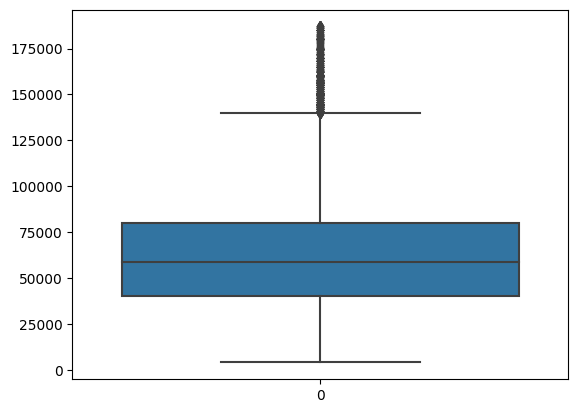

In [ ]:
sns.boxplot(loan['annual_inc'])

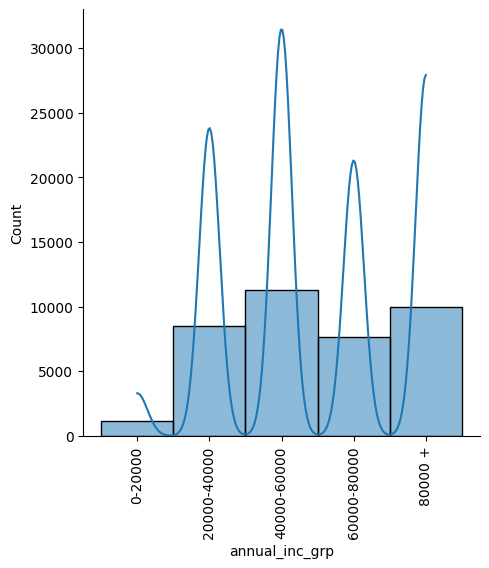

In [ ]:
# Maximum loan is from 40k - 60 k , 0-20k people have lesser loan application 
plt=sns.displot(loan['annual_inc_grp'], kde=True)
plt.set_xticklabels(rotation=90)


In [ ]:
loan['grade'].value_counts()/len(loan) *100 # grade G takes negligble loans no loans and grade B takes maximum

B    30.264147
A    26.038831
C    20.307437
D    13.181429
E     6.903077
F     2.530005
G     0.775073
Name: grade, dtype: float64

In [ ]:
# analysis of home ownership
loan['home_ownership'].value_counts()/len(loan) *100 # RENT and MORTGAGE takes maximum loans and owner takes minimal

RENT        47.904192
MORTGAGE    44.122145
OWN          7.711849
OTHER        0.254037
NONE         0.007777
Name: home_ownership, dtype: float64

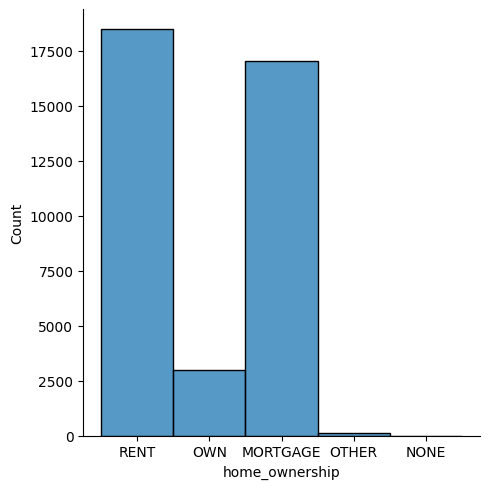

In [ ]:
#Rented and mortage people take more loans
sns.displot(loan['home_ownership'])

In [ ]:
# analysis of the loan status
#14%  of total loan is charged off
loan['loan_status'].value_counts()/len(loan) *100

Fully Paid     85.413588
Charged Off    14.586412
Name: loan_status, dtype: float64

In [ ]:
# analysis for the purpose of the loan
# maximum loan is taken for debt_consolidation
loan['purpose'].value_counts()/len(loan) *100


debt_consolidation    46.802499
credit_card           13.031081
other                 10.018923
home_improvement       7.452627
major_purchase         5.573269
small_business         4.546751
car                    3.885735
wedding                2.400394
medical                1.765301
moving                 1.493118
vacation               0.972082
house                  0.951344
educational            0.842471
renewable_energy       0.264406
Name: purpose, dtype: float64

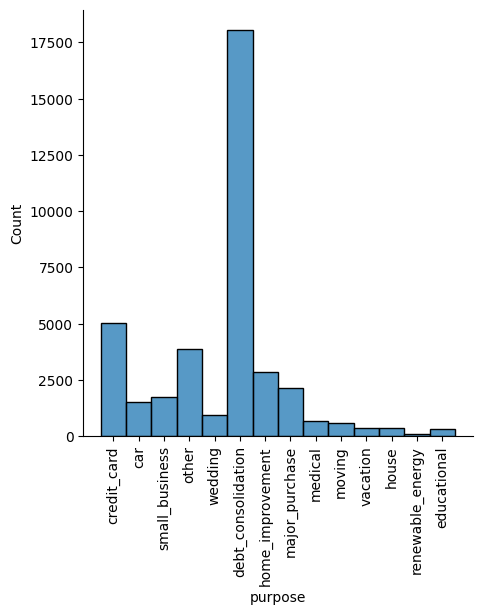

In [ ]:
plt=sns.displot(loan['purpose'])
plt.set_xticklabels(rotation=90)


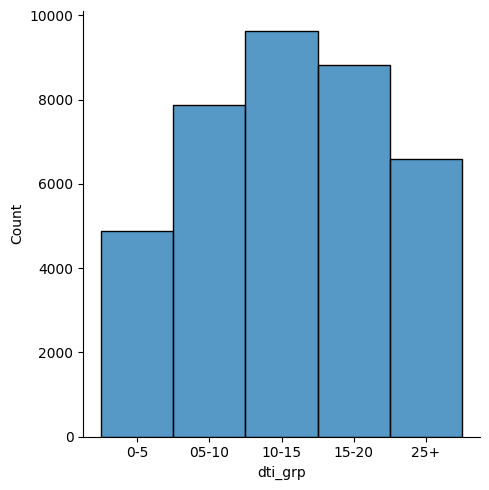

In [ ]:
# analysis of dti
# maximum loan taken is for the dti betweeen 10-15
sns.displot(loan['dti_grp'])

In [ ]:
# loan count is increasing with the years
loan['issue_d_year'].value_counts()

2011    20516
2010    11532
2009     4716
2008     1562
2007      251
Name: issue_d_year, dtype: int64

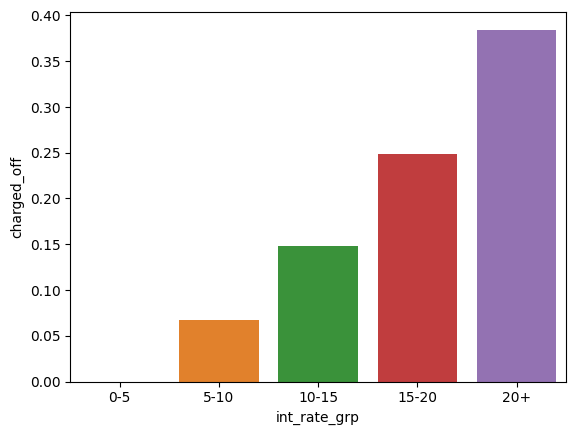

In [ ]:
loan1=loan.groupby(['int_rate_grp','loan_status'])['loan_status'].count()
df_loan1 = loan1.reset_index(name='count')
grouped = loan.groupby(['int_rate_grp', 'loan_status'])
counts = grouped.size()
group_totals = grouped.size().groupby('int_rate_grp').sum()
percentages=counts/group_totals
charged_off_percentages = percentages[percentages.index.get_level_values('loan_status') == 'Charged Off']
df_charged_off = charged_off_percentages.reset_index(name='charged_off')
plt=sns.barplot(data=df_charged_off, x='int_rate_grp', y='charged_off')
df_charged_off = charged_off_percentages.reset_index(name='charged_off')
plt=sns.barplot(data=df_charged_off, x='int_rate_grp', y='charged_off')

## observation
## higher interest rate leads to more charged off , interest rate 20+ has higher charged off


In [ ]:
inc_coff = loan.groupby(['annual_inc_grp', 'loan_status'])
counts = inc_coff.size()
inc_coff_total = inc_coff.size().groupby('annual_inc_grp').sum()
annual_inc_percent=counts/inc_coff_total


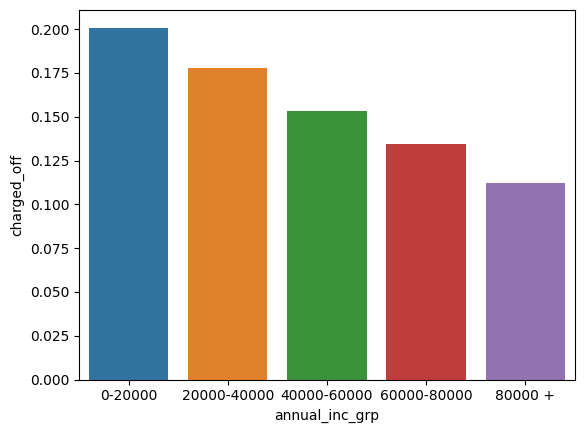

In [ ]:
charged_off_percentages = annual_inc_percent[annual_inc_percent.index.get_level_values('loan_status') == 'Charged Off']
df_charged_off = charged_off_percentages.reset_index(name='charged_off')
plt=sns.barplot(data=df_charged_off, x='annual_inc_grp', y='charged_off')
#observation
### Lesser annual income group defaults more maximum in the range of 0-20k

In [ ]:
charged_off_percentages

annual_inc_grp  loan_status
0-20000         Charged Off    0.200847
20000-40000     Charged Off    0.177741
40000-60000     Charged Off    0.153511
60000-80000     Charged Off    0.134366
80000 +         Charged Off    0.112414
dtype: float64

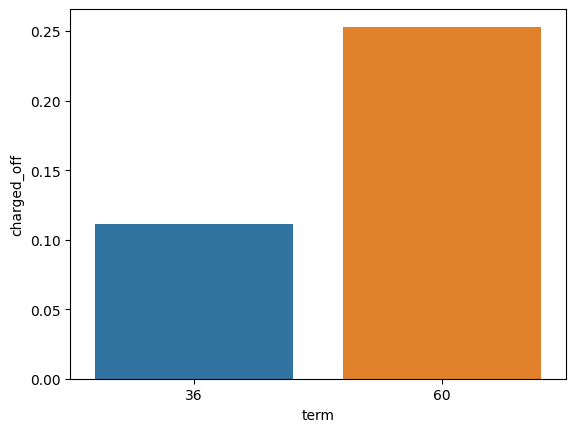

In [ ]:
loan_term= loan.groupby(['term', 'loan_status'])
counts = loan_term.size()
loan_term_total = loan_term.size().groupby('term').sum()
loan_term_percent=counts/loan_term_total
charged_off_percentages = loan_term_percent[loan_term_percent.index.get_level_values('loan_status') == 'Charged Off']
df_charged_off = charged_off_percentages.reset_index(name='charged_off')
plt=sns.barplot(data=df_charged_off, x='term', y='charged_off')

## obseravation the highter leads to more charged off 

In [ ]:
loan_grade= loan.groupby(['grade', 'loan_status'])
counts = loan_grade.size()
loan_grade_total = loan_grade.size().groupby('grade').sum()
loan_grade_percent=counts/loan_grade_total
charged_off_percentages = loan_grade_percent[loan_grade_percent.index.get_level_values('loan_status') == 'Charged Off']

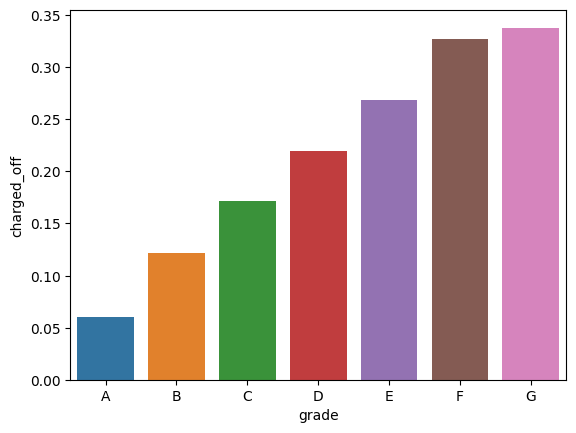

In [ ]:
df_charged_off = charged_off_percentages.reset_index(name='charged_off')
plt=sns.barplot(data=df_charged_off, x='grade', y='charged_off')

## observation
## higher credit grade leads to more charged off 

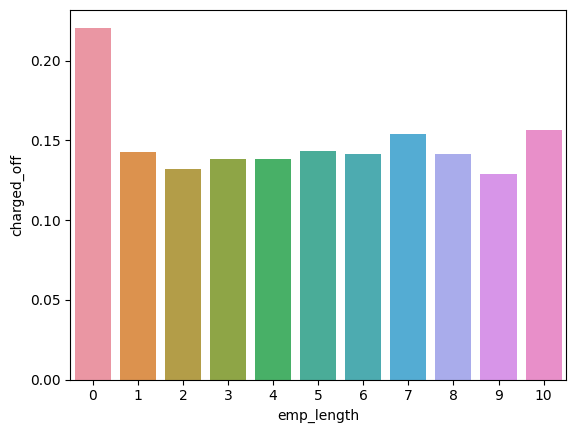

In [ ]:
loan_emp_length= loan.groupby(['emp_length', 'loan_status'])
counts = loan_emp_length.size()
loan_emp_length_total = loan_emp_length.size().groupby('emp_length').sum()
loan_emp_length_percent=counts/loan_emp_length_total
charged_off_percentages = loan_emp_length_percent[loan_emp_length_percent.index.get_level_values('loan_status') == 'Charged Off']
counts
df_charged_off = charged_off_percentages.reset_index(name='charged_off')
plt=sns.barplot(data=df_charged_off, x='emp_length', y='charged_off')


[Text(0, 0, 'MORTGAGE'),
 Text(1, 0, 'OTHER'),
 Text(2, 0, 'OWN'),
 Text(3, 0, 'RENT')]

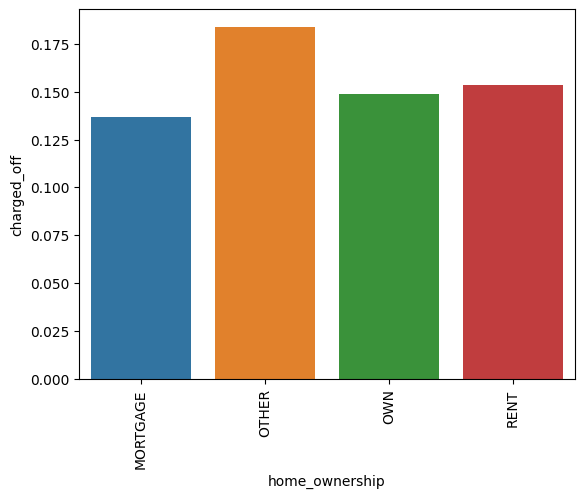

In [ ]:
loan_home_ownership= loan.groupby(['home_ownership', 'loan_status'])
counts = loan_home_ownership.size()
loan_home_ownership_total = loan_home_ownership.size().groupby('home_ownership').sum()
loan_home_ownership_percent=counts/loan_home_ownership_total
charged_off_percentages = loan_home_ownership_percent[loan_home_ownership_percent.index.get_level_values('loan_status') == 'Charged Off']
df_charged_off = charged_off_percentages.reset_index(name='charged_off')
plt=sns.barplot(data=df_charged_off, x='home_ownership', y='charged_off')
plt.set_xticklabels(plt.get_xticklabels(),rotation=90)

## observation other category are more charged off 

## but the loan taken by other is also less in precentage from ealier observation

[Text(0, 0, 'car'),
 Text(1, 0, 'credit_card'),
 Text(2, 0, 'debt_consolidation'),
 Text(3, 0, 'educational'),
 Text(4, 0, 'home_improvement'),
 Text(5, 0, 'house'),
 Text(6, 0, 'major_purchase'),
 Text(7, 0, 'medical'),
 Text(8, 0, 'moving'),
 Text(9, 0, 'other'),
 Text(10, 0, 'renewable_energy'),
 Text(11, 0, 'small_business'),
 Text(12, 0, 'vacation'),
 Text(13, 0, 'wedding')]

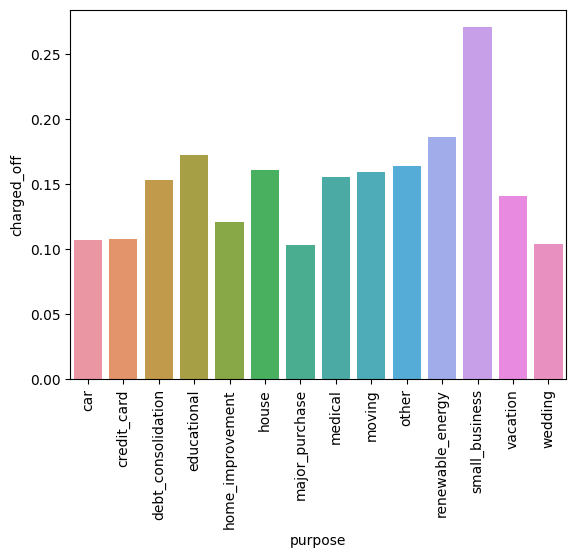

In [ ]:
loan_purpose= loan.groupby(['purpose', 'loan_status'])
counts = loan_purpose.size()
loan_purpose_total = loan_purpose.size().groupby('purpose').sum()
loan_purpose_percent=counts/loan_purpose_total
charged_off_percentages = loan_purpose_percent[loan_purpose_percent.index.get_level_values('loan_status') == 'Charged Off']
df_charged_off = charged_off_percentages.reset_index(name='charged_off')
plt=sns.barplot(data=df_charged_off, x='purpose', y='charged_off')
plt.set_xticklabels(plt.get_xticklabels(),rotation=90)

## observation 
## small buiness loans are more likely to be charged off 

[Text(0, 0, 'AK'),
 Text(1, 0, 'AL'),
 Text(2, 0, 'AR'),
 Text(3, 0, 'AZ'),
 Text(4, 0, 'CA'),
 Text(5, 0, 'CO'),
 Text(6, 0, 'CT'),
 Text(7, 0, 'DC'),
 Text(8, 0, 'DE'),
 Text(9, 0, 'FL'),
 Text(10, 0, 'GA'),
 Text(11, 0, 'HI'),
 Text(12, 0, 'ID'),
 Text(13, 0, 'IL'),
 Text(14, 0, 'KS'),
 Text(15, 0, 'KY'),
 Text(16, 0, 'LA'),
 Text(17, 0, 'MA'),
 Text(18, 0, 'MD'),
 Text(19, 0, 'MI'),
 Text(20, 0, 'MN'),
 Text(21, 0, 'MO'),
 Text(22, 0, 'MS'),
 Text(23, 0, 'MT'),
 Text(24, 0, 'NC'),
 Text(25, 0, 'NE'),
 Text(26, 0, 'NH'),
 Text(27, 0, 'NJ'),
 Text(28, 0, 'NM'),
 Text(29, 0, 'NV'),
 Text(30, 0, 'NY'),
 Text(31, 0, 'OH'),
 Text(32, 0, 'OK'),
 Text(33, 0, 'OR'),
 Text(34, 0, 'PA'),
 Text(35, 0, 'RI'),
 Text(36, 0, 'SC'),
 Text(37, 0, 'SD'),
 Text(38, 0, 'TN'),
 Text(39, 0, 'TX'),
 Text(40, 0, 'UT'),
 Text(41, 0, 'VA'),
 Text(42, 0, 'VT'),
 Text(43, 0, 'WA'),
 Text(44, 0, 'WI'),
 Text(45, 0, 'WV'),
 Text(46, 0, 'WY')]

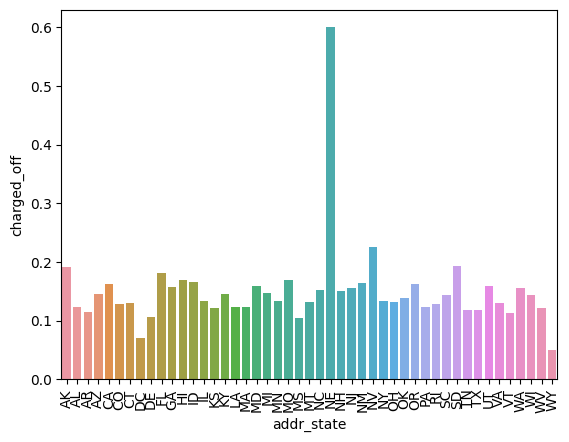

In [ ]:
loan_addr_state= loan.groupby(['addr_state', 'loan_status'])
counts = loan_addr_state.size()
loan_addr_state_total = loan_addr_state.size().groupby('addr_state').sum()
loan_addr_state_percent=counts/loan_addr_state_total
charged_off_percentages = loan_addr_state_percent[loan_addr_state_percent.index.get_level_values('loan_status') == 'Charged Off']
df_charged_off = charged_off_percentages.reset_index(name='charged_off')
plt=sns.barplot(data=df_charged_off, x='addr_state', y='charged_off')
plt.set_xticklabels(plt.get_xticklabels(),rotation=90)

## observation 

# states AK NM NV are more charged off

<Axes: xlabel='issue_d_year,loan_status'>

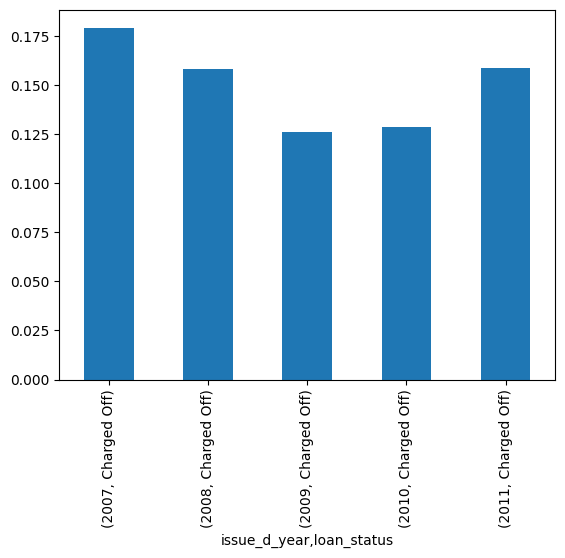

In [ ]:
loan_issue_d_year= loan.groupby(['issue_d_year', 'loan_status'])
counts = loan_issue_d_year.size()
loan_issue_d_year_total = loan_issue_d_year.size().groupby('issue_d_year').sum()
loan_issue_d_year_percent=counts/loan_issue_d_year_total
charged_off_percentages = loan_issue_d_year_percent[loan_issue_d_year_percent.index.get_level_values('loan_status') == 'Charged Off']
charged_off_percentages.plot(kind='bar')

[Text(0, 0, '0-5'),
 Text(1, 0, '05-10'),
 Text(2, 0, '10-15'),
 Text(3, 0, '15-20'),
 Text(4, 0, '25+')]

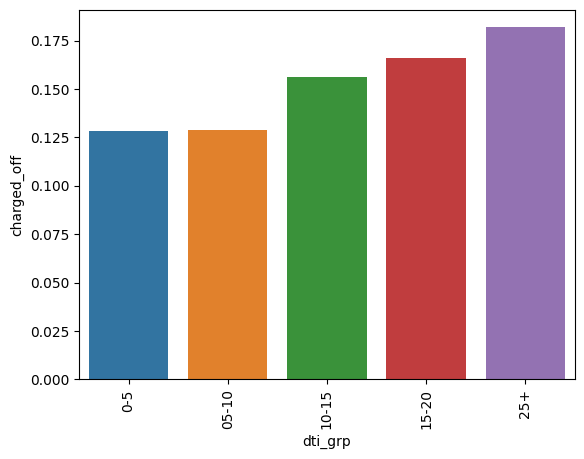

In [ ]:
loan_dti_grp= loan.groupby(['dti_grp', 'loan_status'])
counts = loan_dti_grp.size()
loan_dti_grp_total = loan_dti_grp.size().groupby('dti_grp').sum()
loan_dti_grp_percent=counts/loan_dti_grp_total
charged_off_percentages = loan_dti_grp_percent[loan_dti_grp_percent.index.get_level_values('loan_status') == 'Charged Off']
df_charged_off = charged_off_percentages.reset_index(name='charged_off')
plt=sns.barplot(data=df_charged_off, x='dti_grp', y='charged_off')
plt.set_xticklabels(plt.get_xticklabels(),rotation=90)

[Text(0, 0, 'A1'),
 Text(1, 0, 'A2'),
 Text(2, 0, 'A3'),
 Text(3, 0, 'A4'),
 Text(4, 0, 'A5'),
 Text(5, 0, 'B1'),
 Text(6, 0, 'B2'),
 Text(7, 0, 'B3'),
 Text(8, 0, 'B4'),
 Text(9, 0, 'B5'),
 Text(10, 0, 'C1'),
 Text(11, 0, 'C2'),
 Text(12, 0, 'C3'),
 Text(13, 0, 'C4'),
 Text(14, 0, 'C5'),
 Text(15, 0, 'D1'),
 Text(16, 0, 'D2'),
 Text(17, 0, 'D3'),
 Text(18, 0, 'D4'),
 Text(19, 0, 'D5'),
 Text(20, 0, 'E1'),
 Text(21, 0, 'E2'),
 Text(22, 0, 'E3'),
 Text(23, 0, 'E4'),
 Text(24, 0, 'E5'),
 Text(25, 0, 'F1'),
 Text(26, 0, 'F2'),
 Text(27, 0, 'F3'),
 Text(28, 0, 'F4'),
 Text(29, 0, 'F5'),
 Text(30, 0, 'G1'),
 Text(31, 0, 'G2'),
 Text(32, 0, 'G3'),
 Text(33, 0, 'G4'),
 Text(34, 0, 'G5')]

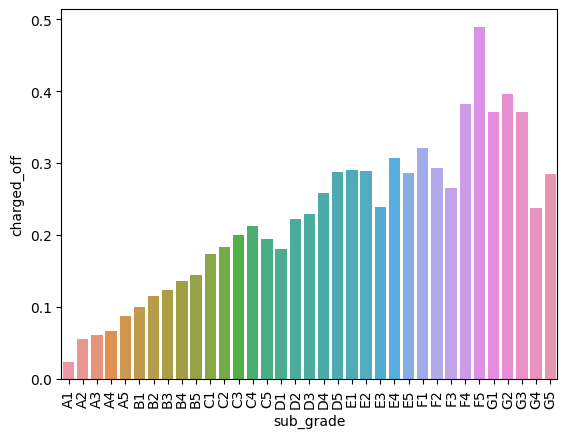

In [ ]:
loan_sub_grade= loan.groupby(['sub_grade', 'loan_status'])
counts = loan_sub_grade.size()
loan_sub_grade_total = loan_sub_grade.size().groupby('sub_grade').sum()
loan_sub_grade_percent=counts/loan_sub_grade_total
charged_off_percentages = loan_sub_grade_percent[loan_sub_grade_percent.index.get_level_values('loan_status') == 'Charged Off']
df_charged_off = charged_off_percentages.reset_index(name='charged_off')
plt=sns.barplot(data=df_charged_off, x='sub_grade', y='charged_off')
plt.set_xticklabels(plt.get_xticklabels(),rotation=90)
## observation 
## G and F sub grade are more charged off


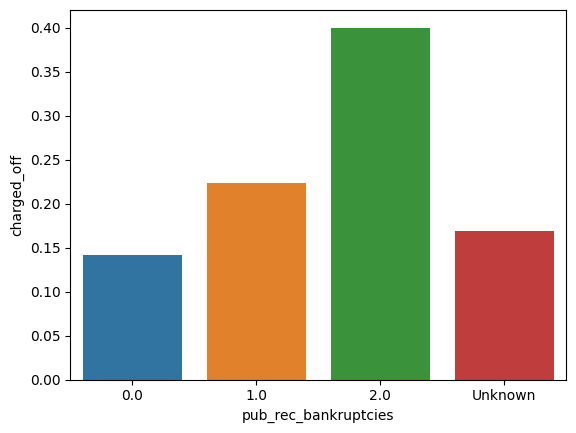

In [88]:
# customer who have defaulted are more likely to be dafaulted

loan_addr_state= loan.groupby(['pub_rec_bankruptcies', 'loan_status'])
counts = loan_addr_state.size()
loan_addr_state_total = loan_addr_state.size().groupby('pub_rec_bankruptcies').sum()
loan_addr_state_percent=counts/loan_addr_state_total
charged_off_percentages = loan_addr_state_percent[loan_addr_state_percent.index.get_level_values('loan_status') == 'Charged Off']
df_charged_off = charged_off_percentages.reset_index(name='charged_off')
plt=sns.barplot(data=df_charged_off, x='pub_rec_bankruptcies', y='charged_off')


<Axes: xlabel='issue_d_year'>

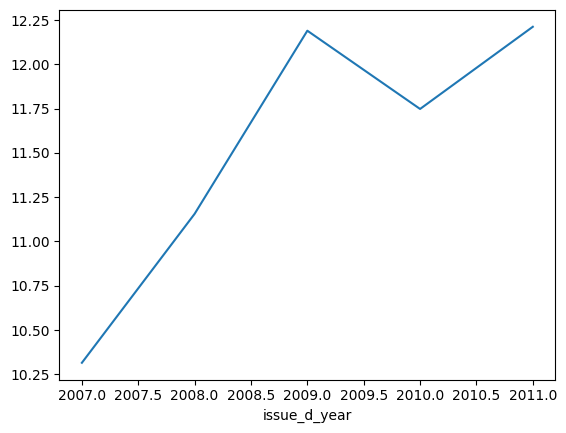

In [ ]:
loan.groupby('issue_d_year')['int_rate'].mean().plot()

## observation interest rate increases with the years except 2008 - 2010 (recession)

<Axes: xlabel='grade', ylabel='annual_inc'>

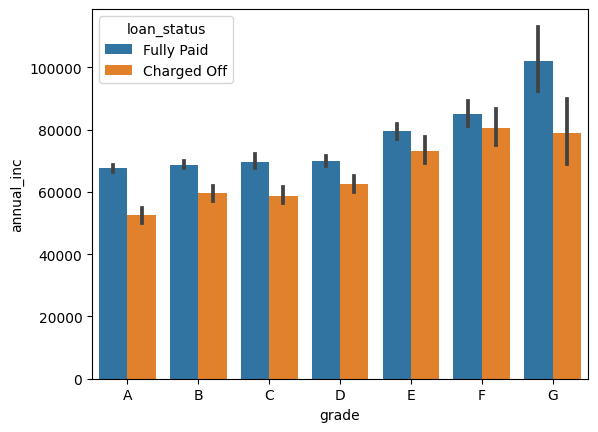

In [ ]:
## observation
## annual income increases with credit grade
sns.barplot(x='grade', y='annual_inc', hue="loan_status", data=loan, estimator=np.mean,order='ABCDEFG')

<Axes: xlabel='int_rate', ylabel='purpose'>

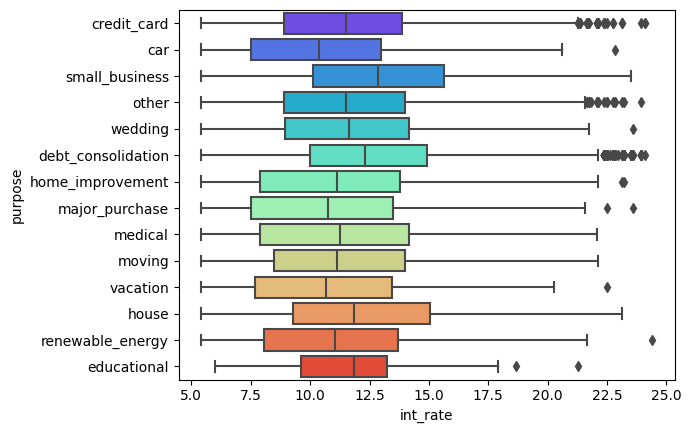

In [ ]:
## observation
## more the loan ampunt more is the interest rate 
sns.boxplot(y='purpose', x='int_rate', data =loan,palette='rainbow')

<Axes: xlabel='grade', ylabel='int_rate'>

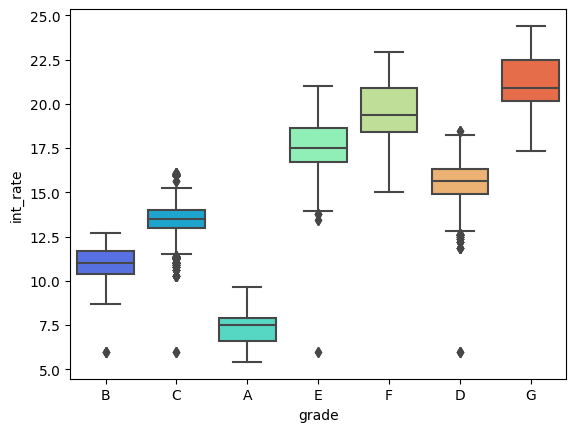

In [ ]:
sns.boxplot(y='int_rate', x='grade', data =loan,palette='rainbow')

<Axes: xlabel='loan_amount_grp', ylabel='int_rate'>

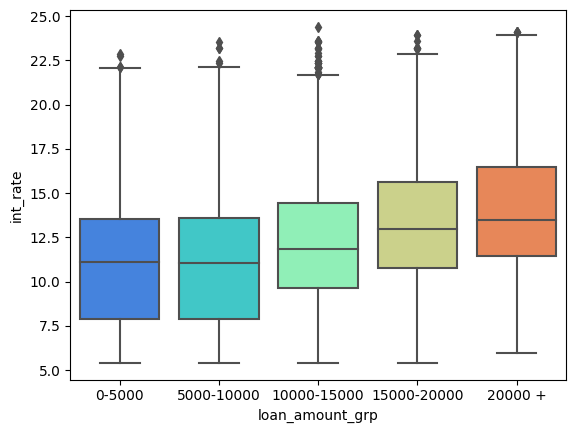

In [ ]:
sns.boxplot(y='int_rate', x='loan_amount_grp', data =loan,palette='rainbow')

<Axes: xlabel='emp_length', ylabel='int_rate'>

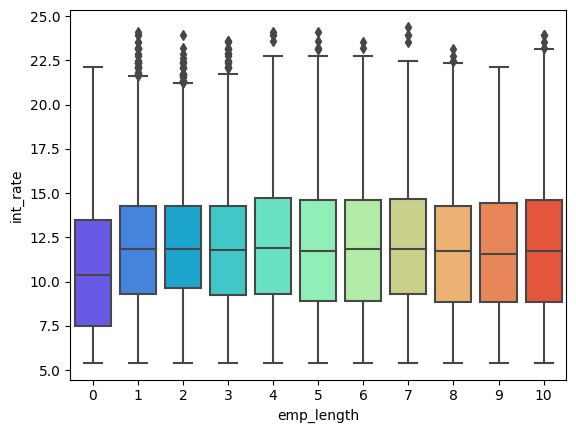

In [ ]:
sns.boxplot(y='int_rate', x='emp_length', data =loan,palette='rainbow')

In [78]:
# analyzing the segmented data which containg higher income group and interest rate is less for defaulters
loan2=loan[(loan['annual_inc_grp'] == '80000 +') & (loan['loan_status'] == 'Charged Off') & (loan['int_rate'] < 12)]

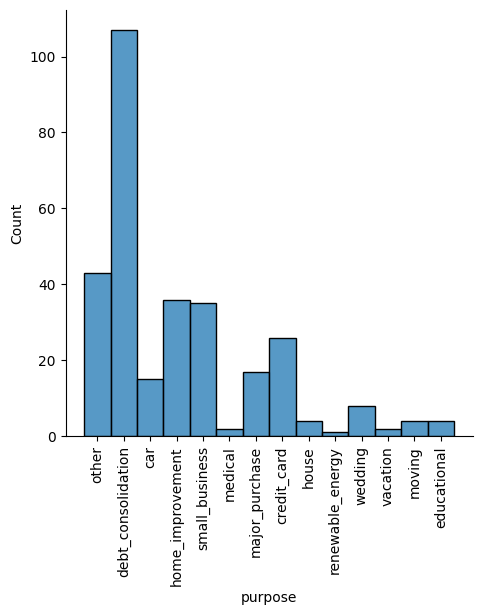

In [85]:
plt=sns.displot(loan2['purpose'])
plt.set_xticklabels(rotation=90)


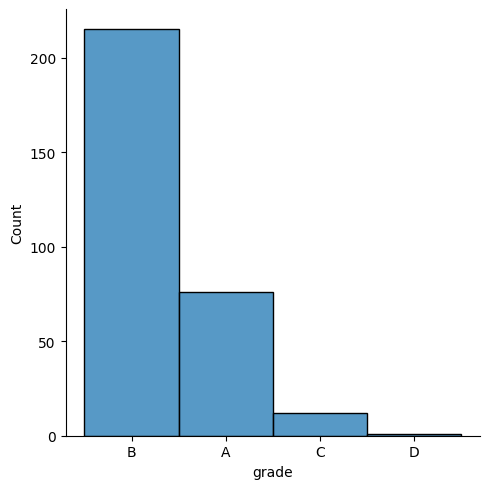

In [87]:
plt=sns.displot(loan2['grade'])